In [160]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("talk")

In [161]:
df = pd.read_csv('./data/container.csv',parse_dates=['date'],index_col='date')
df = df.loc[:'2021']
df.head()

,container,Total
date,,
2007-01-01,204.7,2828.2
2007-02-01,181.0,2512.5
2007-03-01,202.8,2850.2
2007-04-01,220.1,3027.7
2007-05-01,220.8,3139.4


In [162]:
df['month'] = df.index.month
df.head()

,container,Total,month
date,,,
2007-01-01,204.7,2828.2,1
2007-02-01,181.0,2512.5,2
2007-03-01,202.8,2850.2,3
2007-04-01,220.1,3027.7,4
2007-05-01,220.8,3139.4,5


Text(0.5, 1.0, 'container freight')

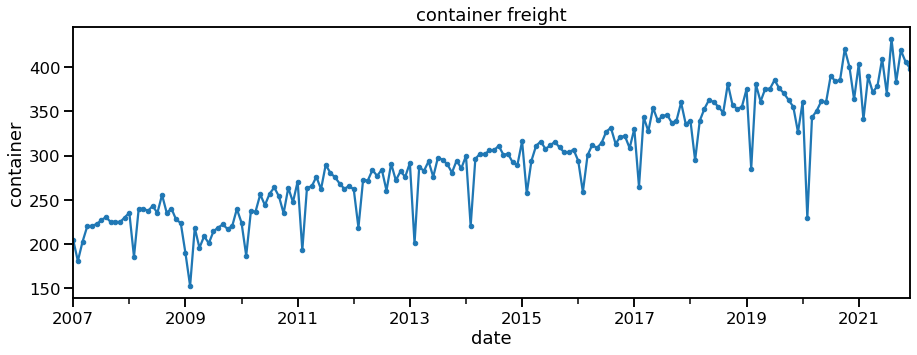

In [163]:
ax = df['container'].plot(marker='.',figsize=(15,5))
ax.set_ylabel('container')
ax.set_title('container freight')

# trend 추출

In [164]:
from statsmodels.nonparametric.smoothers_lowess import lowess

In [165]:
# lowess의 결과 뭔지 잘 모르겠음

In [166]:
frac = 0.08
res = lowess(endog=df['container'],
            exog= df.index,
             frac= frac
            )

df['trend_lowess'] = res[:,1]

Text(0, 0.5, 'Container freight')

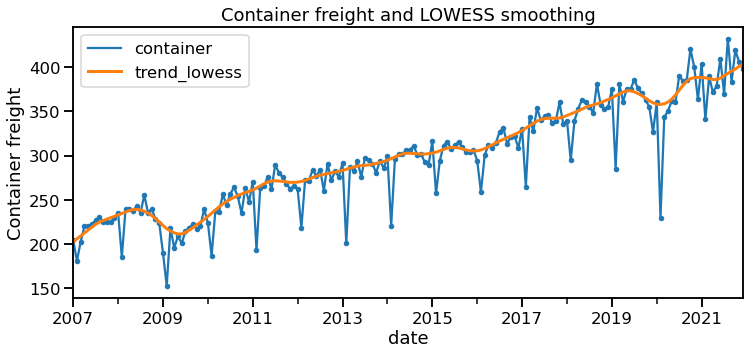

In [167]:
# Plot the fit
fig, ax = plt.subplots(figsize=[12, 5])
df.plot(y="container", marker=".", ax=ax)
df.plot(y="trend_lowess", ax=ax, linewidth=3)
ax.set_title("Container freight and LOWESS smoothing")
ax.set_ylabel("Container freight")

 # detrend

Text(0, 0.5, 'Container freight')

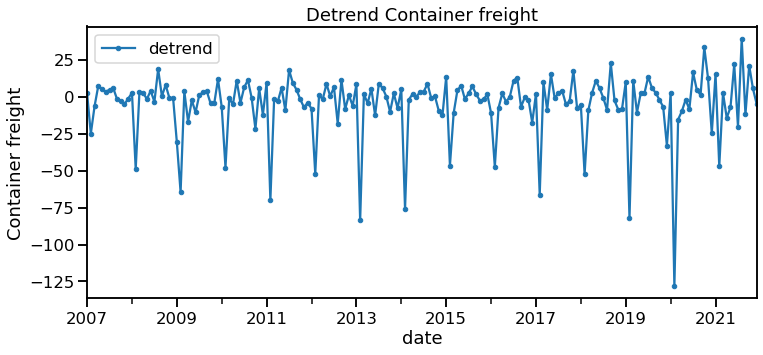

In [168]:
df['detrend'] = df['container'] - df['trend_lowess']

# Plot the fit
fig, ax = plt.subplots(figsize=[12, 5])
df.plot(y="detrend", marker=".", ax=ax)
ax.set_title("Detrend Container freight")
ax.set_ylabel("Container freight")

 # seasonal

In [169]:
df.head()

,container,Total,month,trend_lowess,detrend
date,,,,,
2007-01-01,204.7,2828.2,1,202.359904,2.340096
2007-02-01,181.0,2512.5,2,206.098265,-25.098265
2007-03-01,202.8,2850.2,3,209.330475,-6.530475
2007-04-01,220.1,3027.7,4,212.746503,7.353497
2007-05-01,220.8,3139.4,5,215.940815,4.859185


In [170]:
df['year'] = df.index.year
df['month'] = df.index.month

In [171]:
# 월별 평균 물동량
df.groupby('month').mean()['detrend']

month
1      0.482500
2    -62.558038
3     -1.521910
4     -3.683672
5      3.619035
6     -0.524583
7      4.616706
8      7.218341
9      1.351345
10     0.108663
11    -0.177128
12    -8.590073
Name: detrend, dtype: float64

Text(0.5, 1.0, 'Container freight by month')

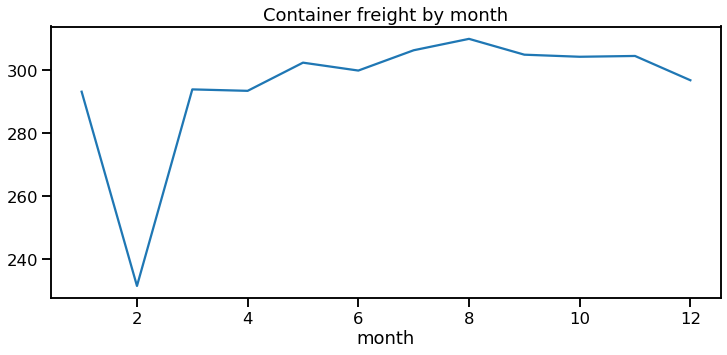

In [172]:
fig, ax = plt.subplots(figsize=(12,5))
df.groupby('month').mean()['container'].plot(ax=ax)
ax.set_title('Container freight by month')

Text(0.5, 1.0, 'Container freight by month')

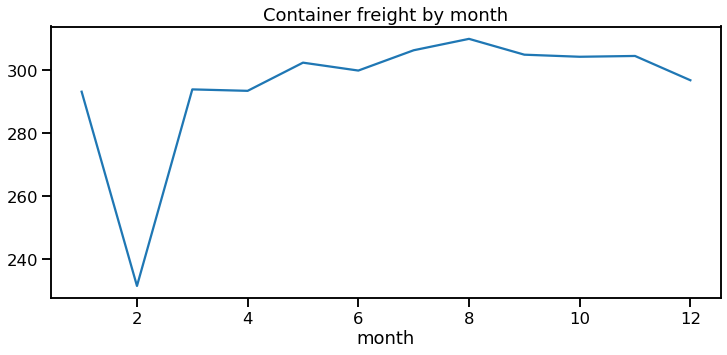

In [173]:
# month 추출
df['month'] = df.index.month

# 월별 평균 물동량
df.groupby('month').mean()['detrend']

fig, ax = plt.subplots(figsize=(12,5))
df.groupby('month').mean()['container'].plot(ax=ax)
ax.set_title('Container freight by month')

In [151]:
seasonal = df.groupby('month').mean()['detrend']
seasonal.name = 'seasonal'
seasonal

month
1      0.482500
2    -62.558038
3     -1.521910
4     -3.683672
5      3.619035
6     -0.524583
7      4.616706
8      7.218341
9      1.351345
10     0.108663
11    -0.177128
12    -8.590073
Name: seasonal, dtype: float64

In [152]:
seasonal.index

Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], dtype='int64', name='month')

 # Residual

In [153]:
df1 = df.merge(right=seasonal, left_on='month',right_index=True )
df1 = df1.sort_index()
df1['resid'] = df1['detrend']- df1['seasonal']
df1.head()

,container,Total,trend_lowess,detrend,year,month,seasonal,resid
date,,,,,,,,
2007-01-01,204.7,2828.2,202.359904,2.340096,2007,1,0.482500,1.857596
2007-02-01,181.0,2512.5,206.098265,-25.098265,2007,2,-62.558038,37.459773
2007-03-01,202.8,2850.2,209.330475,-6.530475,2007,3,-1.521910,-5.008564
2007-04-01,220.1,3027.7,212.746503,7.353497,2007,4,-3.683672,11.037168
2007-05-01,220.8,3139.4,215.940815,4.859185,2007,5,3.619035,1.240150


In [155]:
df1[['container','Total','seasonal']]

,container,Total,seasonal
date,,,
2007-01-01,204.7,2828.2,0.482500
2007-02-01,181.0,2512.5,-62.558038
2007-03-01,202.8,2850.2,-1.521910
2007-04-01,220.1,3027.7,-3.683672
2007-05-01,220.8,3139.4,3.619035
...,...,...,...
2021-08-01,432.0,4985.8,7.218341
2021-09-01,383.5,4303.8,1.351345
2021-10-01,419.0,4617.2,0.108663


<AxesSubplot:xlabel='date'>

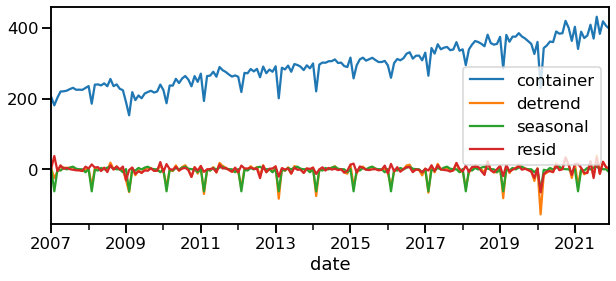

In [154]:
col = ['container','detrend','seasonal','resid']
fig, ax = plt.subplots(figsize=(10,4))
df1[col].plot(ax=ax)

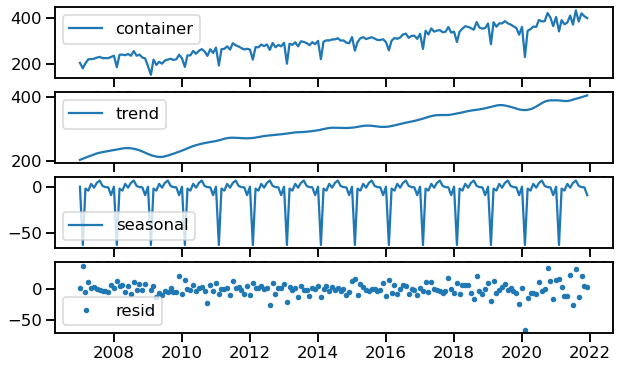

In [137]:
fig, ax = plt.subplots(nrows=4, figsize=(10,6)) 
ax[0].plot(df1['container'], label='container')
ax[0].legend()

ax[1].plot(df1['trend_lowess'], label='trend')
ax[1].legend()

ax[2].plot(df1['seasonal'], label='seasonal')
ax[2].legend()

ax[3].plot(df1['resid'],label='resid', marker='.', ls='None')
ax[3].legend()

# 1년 기준인 것을 모른다면

## lag plot

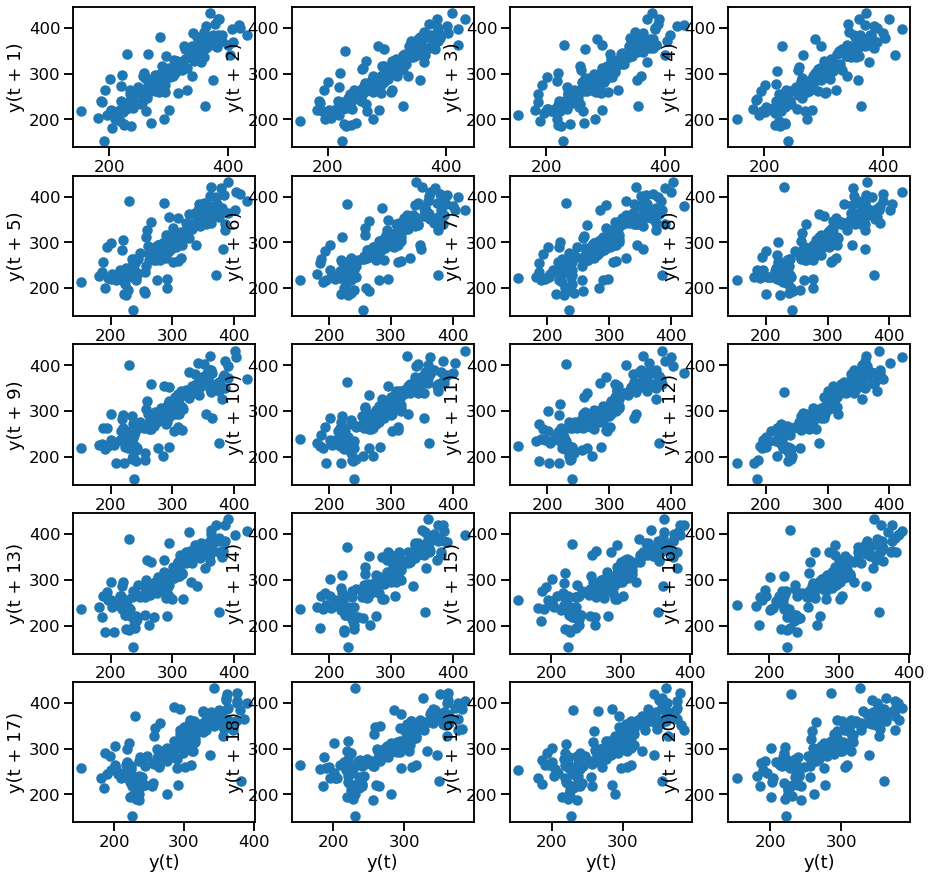

In [184]:
fig, axs = plt.subplots(ncols=4,nrows=5,figsize=(15,15))
for i,ax in enumerate(axs.flatten()):
    pd.plotting.lag_plot(df1['container'],lag=i+1,ax=ax)

## acf,pacf

In [ ]:
# timeseries decomposition

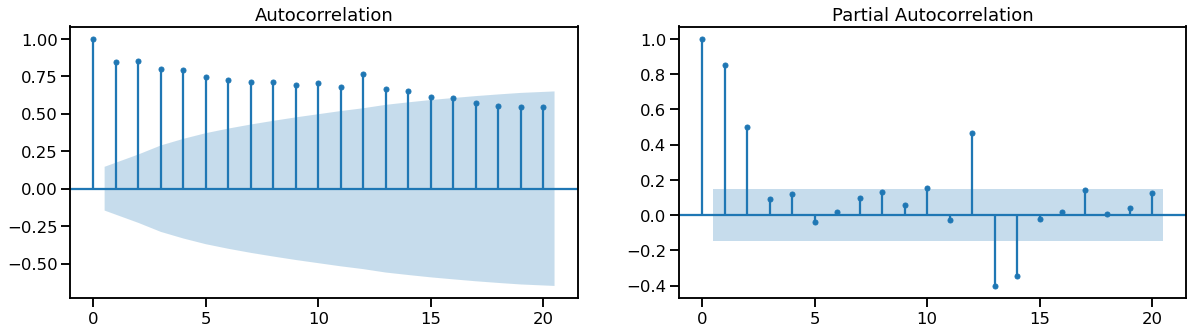

In [195]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
fig, axs = plt.subplots(1,2,figsize=(20,5))
acf = plot_acf(df1['container'],lags=20,ax=axs[0])
pacf = plot_pacf(df1['container'],lags=20,ax=axs[1])

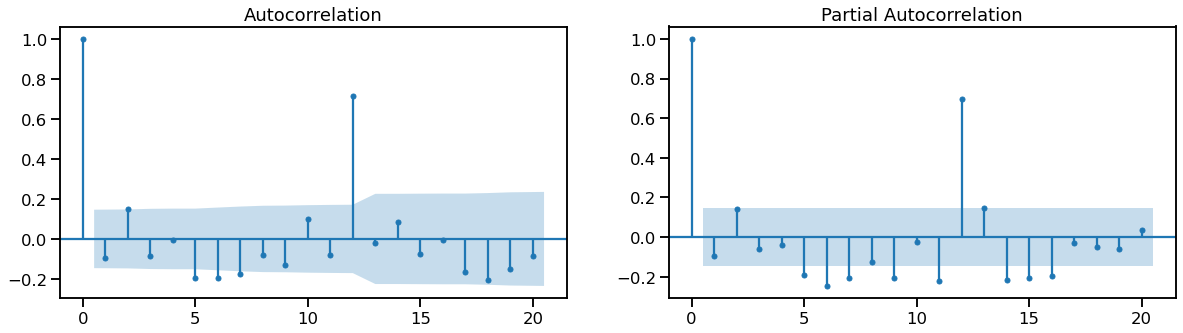

In [197]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
fig, axs = plt.subplots(1,2,figsize=(20,5))
acf = plot_acf(df1['detrend'],lags=20,ax=axs[0])
pacf = plot_pacf(df1['detrend'],lags=20,ax=axs[1])

# 임의의 데이터라면?? 어떤 형태

In [242]:
np.random.rand(100)*10

array([8.23815117, 0.20502805, 6.36198225, 8.62474141, 4.77932599,
       4.32959742, 8.57701377, 6.15842633, 5.89065002, 4.49422989,
       0.21370739, 5.52940782, 4.76676581, 0.59635655, 7.50333868,
       9.76318125, 2.11297986, 2.72677452, 4.54366238, 1.24525851,
       2.31792445, 7.43433845, 5.47119332, 6.99437492, 2.80875825,
       6.11904421, 4.47083423, 8.19988622, 8.76721453, 2.72855719,
       7.30397447, 3.67493047, 1.27226087, 1.23929301, 2.06259993,
       7.0407377 , 8.02014028, 5.0000376 , 3.4122305 , 2.35137607,
       8.26693374, 7.31637598, 1.86888564, 2.87554355, 9.52586009,
       2.00330498, 1.4066317 , 1.88730206, 4.99145611, 1.25986766,
       6.53359782, 9.09694793, 4.78072086, 7.8002157 , 9.21669211,
       7.08140994, 5.16010408, 0.02829099, 8.1749398 , 3.14904821,
       8.01828695, 4.80721964, 4.36616254, 9.84538793, 7.3428817 ,
       5.78640666, 7.07229356, 6.7926585 , 3.62454507, 9.13180806,
       5.55454875, 3.88107389, 8.14763584, 4.10999725, 8.30461

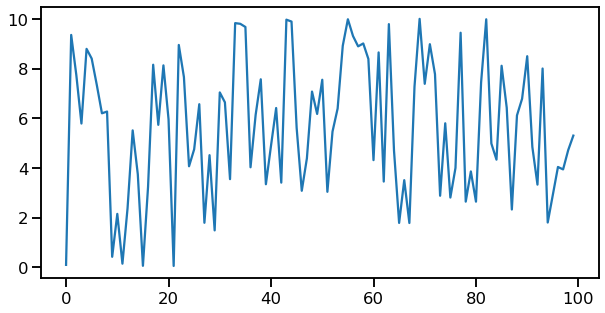

In [245]:
x = [i for i in range(100)]
y = np.random.rand(100)*10
plt.figure(figsize=(10,5))
plt.plot(x,y)
plt.show()

In [249]:
y.tolist()

[0.10535097359895329,
 9.352011858966371,
 7.741960298171805,
 5.789107063316098,
 8.7918988709932,
 8.401819499782228,
 7.338346022316427,
 6.2006514103277475,
 6.270303371397851,
 0.4302139764795776,
 2.1556785191453773,
 0.1531367211276491,
 2.383330887269688,
 5.513648923587655,
 3.748772147390561,
 0.06736963952511887,
 3.238754615730505,
 8.153685838952978,
 5.736445284859194,
 8.127913666126714,
 5.95916333533107,
 0.06208663833755512,
 8.949044724721826,
 7.658365773214694,
 4.071254518320869,
 4.752566941806695,
 6.566464382666589,
 1.7977748573054253,
 4.516713284484654,
 1.492089863300896,
 7.040355440387819,
 6.641924703766113,
 3.5527355279345896,
 9.827294089386621,
 9.799061477409449,
 9.67185349867936,
 4.030174358529224,
 6.141276863242745,
 7.568092862858665,
 3.3479234236125177,
 4.901231202430845,
 6.41321823633997,
 3.412604922385852,
 9.965794675658644,
 9.889325213883328,
 5.617803452649829,
 3.0849847693043797,
 4.389071834331963,
 7.073932561938058,
 6.17544958

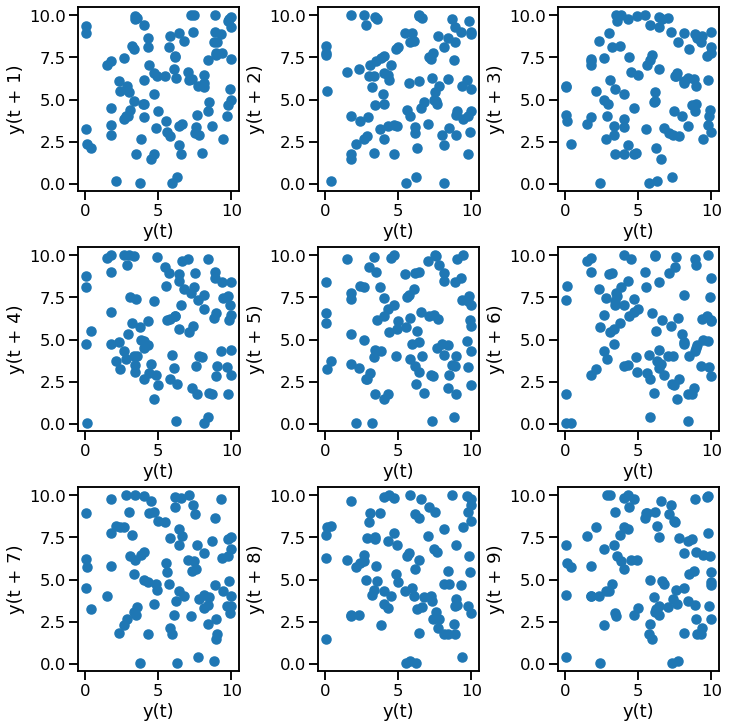

In [255]:
fig ,axs = plt.subplots(ncols=3,nrows=3,figsize=(10,10),constrained_layout=True)
for i,ax in enumerate(axs.flatten()):
    pd.plotting.lag_plot(pd.Series(y), lag=i+1, ax=ax)

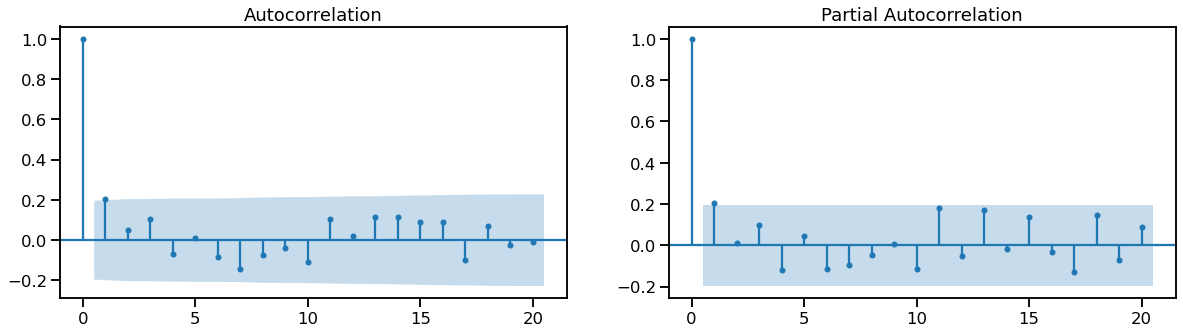

In [256]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
fig, axs = plt.subplots(1,2,figsize=(20,5))
acf = plot_acf(pd.Series(y),lags=20,ax=axs[0])
pacf = plot_pacf(pd.Series(y),lags=20,ax=axs[1])